In [8]:
import os
import torch
import torchvision
import simple_train
from simple_train import PesmodOpticalFlowDataset, get_transform
import utils


In [9]:
batch_size=1
dataset = PesmodOpticalFlowDataset(
    os.path.join('INPUT', 'test'), get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)


Filtering


In [10]:
dataiter = iter(data_loader)
images, labels = dataiter.next()


merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
optical max:237,mean:109.61778328350051, OF Max:255,mean:74.161035733949
optical max:237,mean:109.65261470339426, OF Max:255,mean:77.15992416570217
optical max:236,mean:109.61375653302228, OF Max:255,mean:76.82538155763729
optical max:236,mean:109.69400570716387, OF Max:255,mean:74.8288078151122
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
merged after transform:[ (2304, 2304, 3), (2304, 2304, 3) ]
optical max:237,mean:109.63846277307582, OF Max:255,mean:71.38933836383585
optical max:236,mean:109.64831103415156, OF Max:255,mean:77.2352760848685
optical max:236,mean:109.64618943453816, OF Max:255,mean:78.69759070627974

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 2304, 2304])
<class 'torch.Tensor'>
torch.Size([2304, 2304, 3])


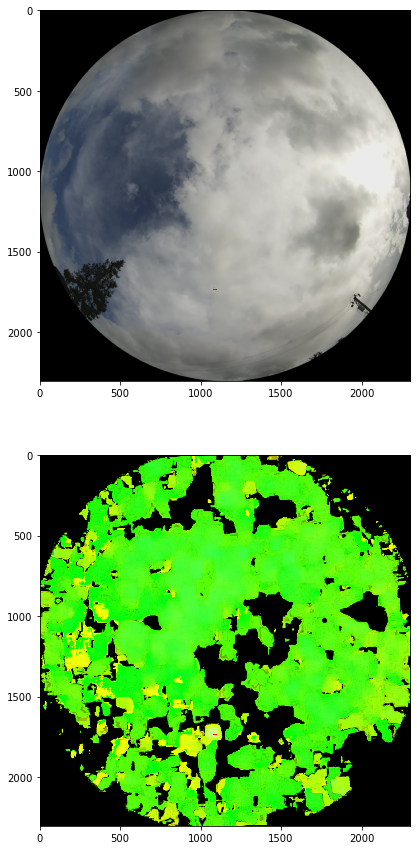

In [15]:
import imgaug
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

for image, target in zip(images,labels):
    
    optical = image[:3]
    of= image[3:]
    print(optical.shape)
    print(type(optical))
    optical = torch.Tensor.moveaxis(optical, 0, -1)
    of = torch.Tensor.moveaxis(of, 0, -1)
    print(optical.shape)
    bbs = imgaug.BoundingBoxesOnImage.from_xyxy_array(
        target['boxes'], optical.shape)
    optical = bbs.draw_on_image(optical, size=2, color=[255, 0, 0])
    of = bbs.draw_on_image(of, size=2, color=[255, 0, 0])
    fig = plt.figure(figsize=(15, 15))
    fig.add_subplot(2, 1, 1) #rows, cols
    plt.imshow(optical, interpolation='nearest')
    fig.add_subplot(2, 1, 2)
    plt.imshow(of, interpolation='nearest')


    #optical = Image.fromarray(np.uint8(cm.gist_earth(optical_tensor)*255))
    #optical.show()
    #of=image[3:]
    break
